In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Method 1 ROOT version (Needs root installed)
import ROOT
from ROOT import TChain, TFile, TH1D, TCanvas

# Method 2 pandas version (Needs root installed)
import root_pandas

# Method 3 uproot version ***NO ROOT NEEDED***
import uproot

Welcome to JupyROOT 6.17/01


CPU times: user 360 ms, sys: 37.5 ms, total: 397 ms
Wall time: 422 ms


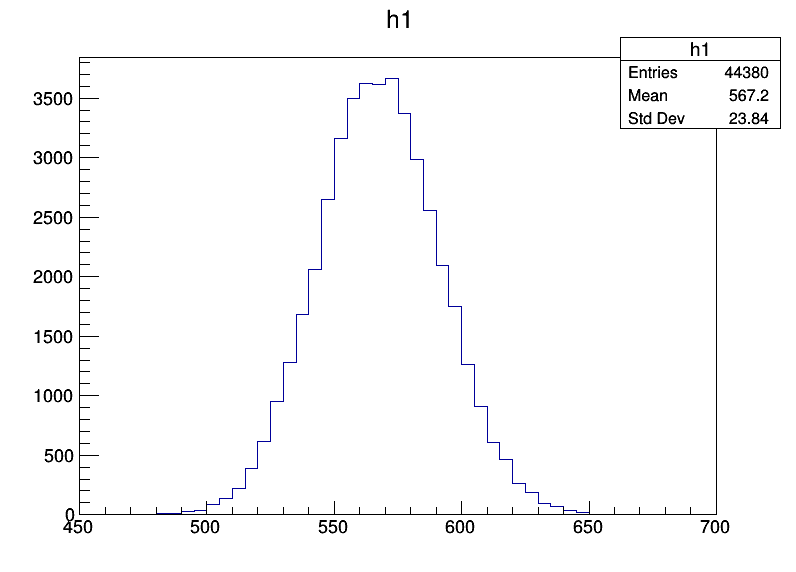

In [2]:
%%time
histogram = TH1D("h1","h1",50,450,700)

f = TFile.Open("500ms_50000s.n0.root")
for event in f.Sr90:
    histogram.Fill(event.x1)
    
c1 = TCanvas("c1","c1",800,600)
histogram.Draw()
c1.Draw()

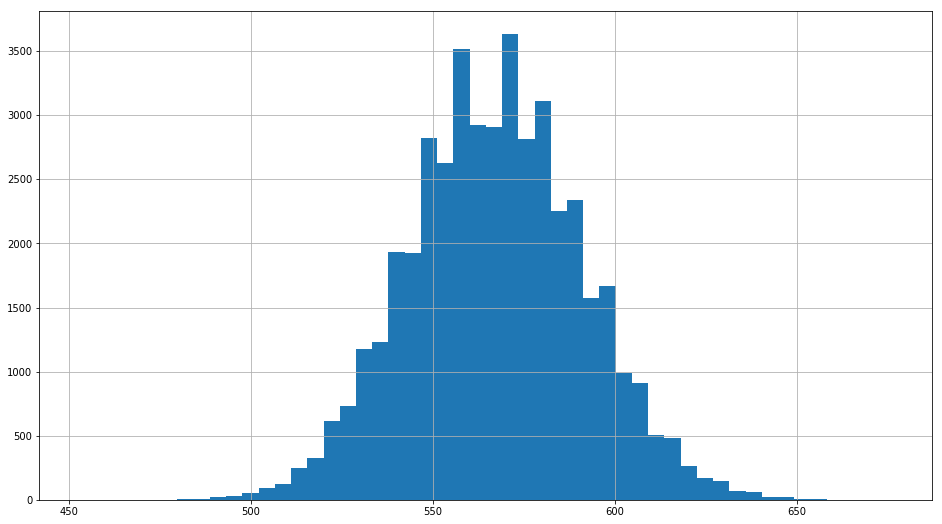

CPU times: user 590 ms, sys: 46.8 ms, total: 637 ms
Wall time: 446 ms


In [3]:
%%time
df = root_pandas.read_root("500ms_50000s.n0.root", "Sr90")
df.x1.hist(bins=50,figsize=(16,9),histtype ='stepfilled')
plt.show()

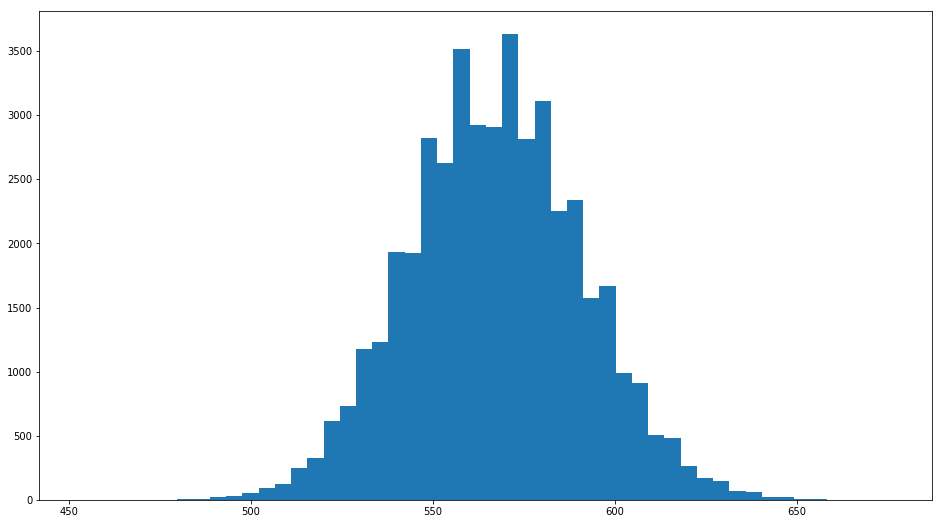

In [4]:
Sr90 = uproot.open("500ms_50000s.n0.root")["Sr90"]
Sr90.arrays()[b'x1']
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(Sr90.arrays()[b'x1'], bins=50, histtype ='stepfilled')
plt.show()